# Выявление определяющих успешность игры закономерностей

Цели работы: 

* Определить потенциально прибыльный продукт
* Провести исследовательский анализ анных, узнать актуальный период развития игровой индустрии, понять средний срок жизни каждой платформы, проверить влияние отзывов критиков и пользователей на продажи внутри каждой платформы
* Построить портреты пользователя каждого региона по предпочтениям платформ и жанров. Выявить влияние рейтинга ESRB на продажи в отдельном регоне
* Проверить гипотезы равны ли средние пользовательские рейтинги платформ Xbox One и PC, а также равны ли средние пользовательские рейтинги жанров action и sports
 
В работе будет идти поэтапно:

Шаг 1. Открытие датасета, первичный осмотр соответствующих типов данных, проверка пропусков, дубликатов и обработка датасета для дальнейшей работы.

Шаг 2. Исследовательский анализ данных.

Шаг 3. Составление портрета пользователя из каждого региона.

Шаг 4. Проверка гипотез. 

Шаг 6. Общий вывод по работе.

### Шаг 1. Предобработка данных. 

In [1]:
# открытие датасета и просмотр общей информации 
# игнор предупреждений
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# приведение столбцов к нужному виду столбцов
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# поиск дубликатов
data.duplicated().sum()

0

Ура!
Дубликатов нет

In [4]:
# поиск пропущенных значений
data.isna().sum()
data.dropna(subset = ['name'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [5]:
# tbd является аббревиатурой to be determinated (Будет решено позже),а пока оно решается, 
# заменим все значения на пропуски, чтобы привести столбец к типу float
data['user_score'] = data['user_score'].apply(lambda x: None if x == 'tbd' else x)
# проверка есть ли ещё значения tbd в столбце
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [6]:
#отлично, теперь можно приводить столбцы к нужному типу данных:
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

In [7]:
for i in data[data['year_of_release'].isna() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()
data['year_of_release'].isna().sum()

146

In [8]:
# дропаем остаток пропущенных значений годов выпуска игры
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'].isna().sum()

0

In [9]:
#приведение года выпуска игр в тип данных целочисленный
data['year_of_release'] = data['year_of_release'].astype(int)
data['year_of_release'].dtypes

dtype('int64')

In [10]:
#приведение оценок пользователей в тип float
data['user_score'] = data['user_score'].infer_objects()
data['user_score'].dtypes

dtype('float64')

In [12]:
# подсчёт суммарных продаж во всех регионах 
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [13]:
# при проверке классификации ESRB было обнаружено, что рейтинг E раньше назывался К-А, по факту это 
#один и тот же рейтинг, поэтому произведём объединение
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating             6699
total_sales           0
dtype: int64

Причины появления пропусков в столбце с оценками логично отнести к отсутствию мнения у некоторых пользователей об выпущенной игре, а критики либо ещё не успели провести оценку, либо это игры до появления направления критики игр вообще, то есть 1985-го года, к примеру. 
Приведением к нужным типам были подвергнуты стлбцы с датой релиза, оценок пользователей и критиков.  

### Шаг 2. Исследовательский анализ данных

Посчитаем для начала сколько игр было выпущено за все года.

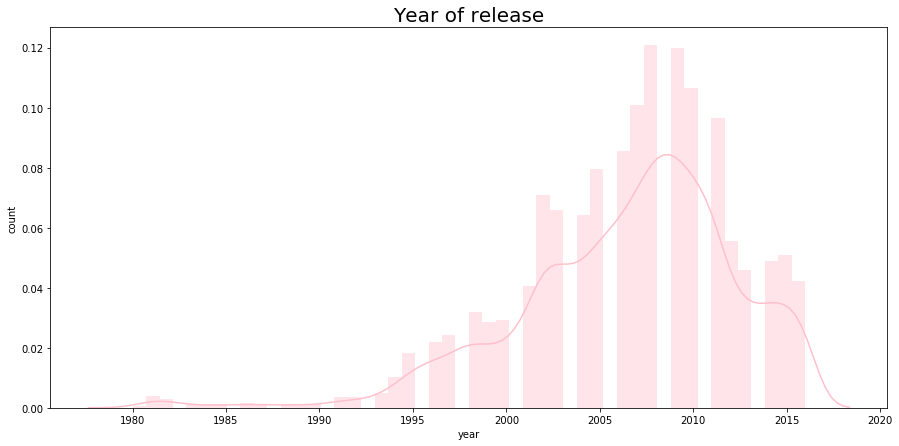

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15, 7))
sns.distplot(data['year_of_release'], color='pink')
plt.title('Year of release', fontsize=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()


Посмотрим информацию о границах выбросов через метод describe(), выведем ящик с усами и определим актуальный период. 

In [16]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,8075.000000,7540.000000,16567.000000
mean,2006.491881,0.263975,0.145814,0.078020,0.047567,68.991950,7.125027,0.535376
std,5.862239,0.816474,0.505364,0.310068,0.187476,13.923383,1.498254,1.554281
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [17]:
#data.boxplot(column='year_of_release', vert=False)
#plt.title('boxplot')
#plt.show()

In [18]:
#q3=data['year_of_release'].quantile(.75)
#q1=data['year_of_release'].quantile(.25)
#iqr=(q3-q1)*1.5
#qr = q1-iqr
#qr

In [19]:
df = data.query('year_of_release >= 2012')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1577
user_score         1359
rating             1276
total_sales           0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
name               2899 non-null object
platform           2899 non-null object
year_of_release    2899 non-null int64
genre              2899 non-null object
na_sales           2899 non-null float64
eu_sales           2899 non-null float64
jp_sales           2899 non-null float64
other_sales        2899 non-null float64
critic_score       1322 non-null float64
user_score         1540 non-null float64
rating             1623 non-null object
total_sales        2899 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 294.4+ KB


Посмотрим как менялись продажи по платформам, построим наглядное распределение

In [22]:
# сборка сводной таблицы по сумме количества продаж и топ-5 платформ 
platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(5)
platform

,platform,total_sales
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32


In [23]:
def year_total_sale_for_platform(name, data):
    slicee = df[(df['platform'] == name) & (df['year_of_release'] >= 2012)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

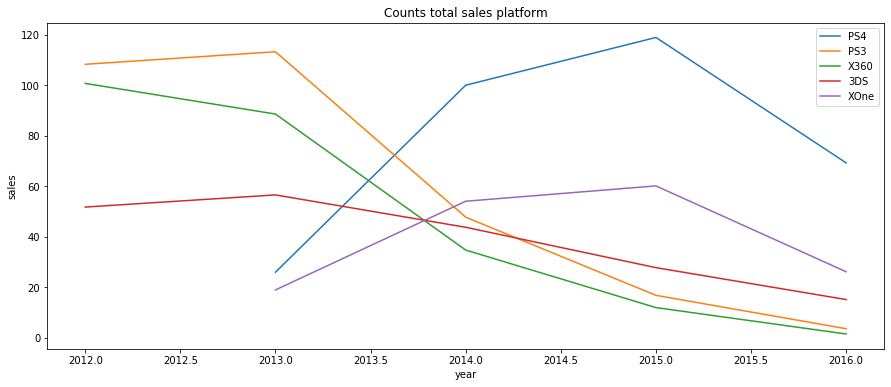

In [24]:
plt.figure(figsize=(15,6))
plt.title('Counts total sales platform')
plt.xlabel('year')
plt.ylabel('sales')

for i in list(platform['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)


По графику можно сделать вывод, что платформы в среднем живут не больше 9 лет. В среднем за 2-4 года платформы достигают пика популярности, держатся на пике ещё года 2-3, за это время компании успевают создать свежую платформу (лучше предыдущей версии) и соответственно предыдущий продукт после этого начинает падать в популярности.


Из созданной сводной таблицы мы выяснили, что лидирующая компания на рынке SONY с продуктом PS2в разрезе анализируемых последних 15 лет. Проверим сохраняет ли тенденцию и планку SONY, отрисуем график для наглядного определения потенциально прибыльных платформ.

In [25]:
def year_total_sale_for_all_platform(name, data):
    slicee = df[(df['platform'] == name) & (df['year_of_release'] > 2009)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

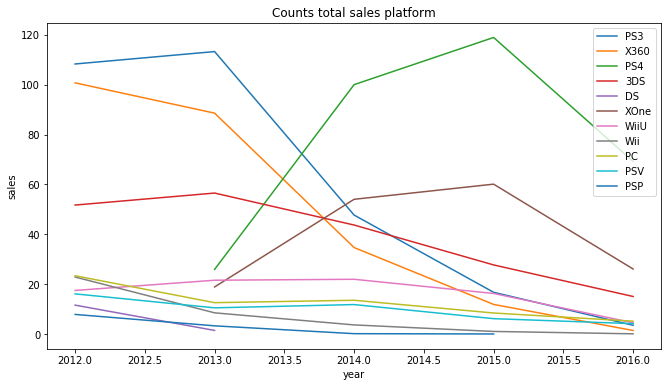

In [26]:
all_platform = df[df['year_of_release'] > 2009]['platform'].unique()

plt.figure(figsize=(11,6))
plt.title('Counts total sales platform')
plt.xlabel('year')
plt.ylabel('sales')

for i in all_platform:

    sns.lineplot(data=year_total_sale_for_all_platform(i,df)['total_sales'], label=i)
    plt.legend()

Учитывая, что мы ведём исследование в 2016 году, соответственно, данные за 2016 год неполные.
Помня об этом, мы видим две потенциально прибыльные платформы конкурирующих компаний SONY и Microsoft. 

Построим ящик с усами по глобальным продажам игр в разбивке по плаформам

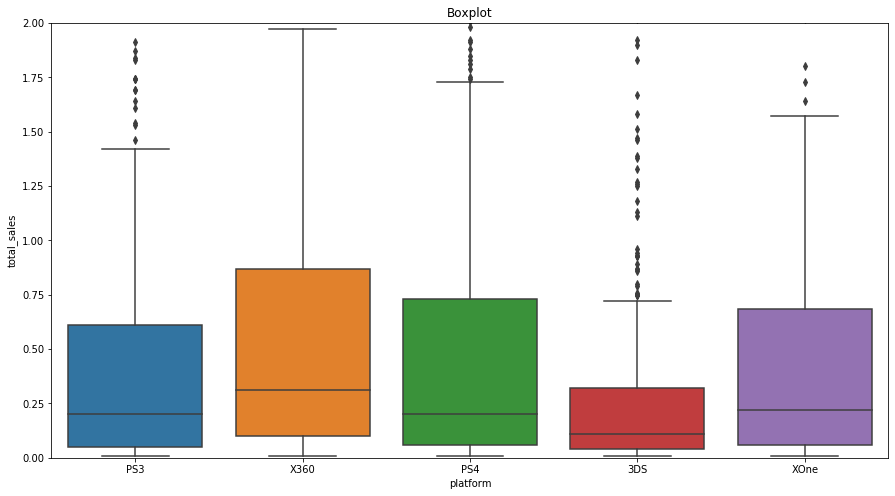

In [27]:
#создаём словарь, в который вкладываем столбец названий топ-5 платформ, чтобы по нему сделать срез
dic = platform['platform'].tolist()
lid_platform = df.query('platform == @dic')
plt.figure(figsize=(15, 8))
sns.boxplot(data=lid_platform, x='platform', y='total_sales')
plt.ylim(0, 2)
plt.title('Boxplot')
plt.show()

Средние значения глобальных продаж отображены на графике и можно увидеть что у платформы x360 это значение выше остальных платформ, это можно предположить, что Xbox360 существовал дольше платформ PS4 и Xone. Обе последние упомянутые платформы имею средние значения по глобальным продажам примерно на одном уровне из-за одинаковой популярности обеих платформ и из-за одновременного выхода на рынок.

Теперь нужно проверить как влияют отзывы пользователей и критиков на продажи одной популярной платформы

In [28]:
# проверим корреляцию отзывов пользователей и глобальными продажамипо платформу PS2
ps4 = df.query('platform == "PS4"')

In [29]:
# создаём корреляционную матрицу
display(ps4[['user_score', 'critic_score', 'total_sales']].corr())

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Как мы видим, значение корреляции ближе к нулю, что говорит о никаком влиянии оценок пользователей на продажи.
Для наглядности построим также диаграмму рассеяния, чтобы убедиться окончательно.

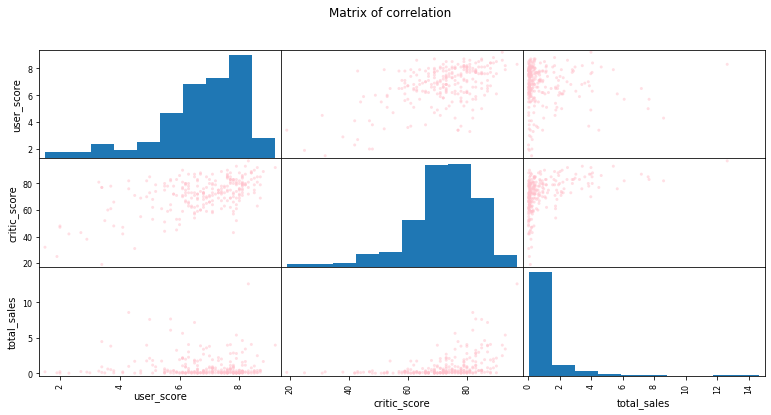

In [30]:
pd.plotting.scatter_matrix(ps4[['user_score', 'critic_score', 'total_sales']], figsize=(13,6), color='pink');
plt.suptitle('Matrix of correlation')
plt.show()

 На диаграмме видно умеренную корреляцию между отзывами критиков и пользователей. В отношении продаж  отзывы критиков и пользователей влияют незначительно. Отрицательная корреляция обычно гвоорит о том, что рост одного значения влияет на понижение другого значения. Здесь есть крохотная отрицательная корреляция, но незначительня для установления отзывов как важный параметр.

(array([[1., 1.],
        [1., 1.]]),
 array([[1., 1.],
        [1., 1.]]))

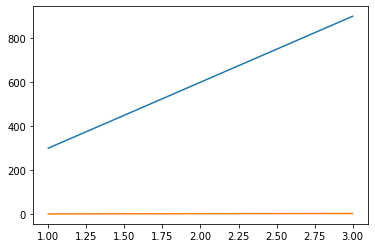

In [31]:
import numpy as np
# Код ревьюера
a = np.array([1, 2, 3])
b = np.array([300, 600, 900])
diag = np.array([1, 2, 3])

plt.plot(a, b)
plt.plot(a, diag)

np.corrcoef(a, b), np.corrcoef(a, diag)

Сделаем ту же самую процедуру, но со всеми остальными платформами, а не с PS2.

In [ ]:
# создаём срез по всем платформам, где нет ps4
not_ps4 = df.query('platform != "PS4"')

In [33]:
# создаём корреляционную матрицу
display(not_ps4[['user_score', 'critic_score', 'total_sales']].corr())

,user_score,critic_score,total_sales
user_score,1.000000,0.509054,0.009703
critic_score,0.509054,1.000000,0.284574
total_sales,0.009703,0.284574,1.000000


По цифрам видим такую же плачевную корреляцию отзывов с продажами. 
Всё равно отрисуем диаграмму рассеивания как и в первом случае и посмотрим наглядно. 

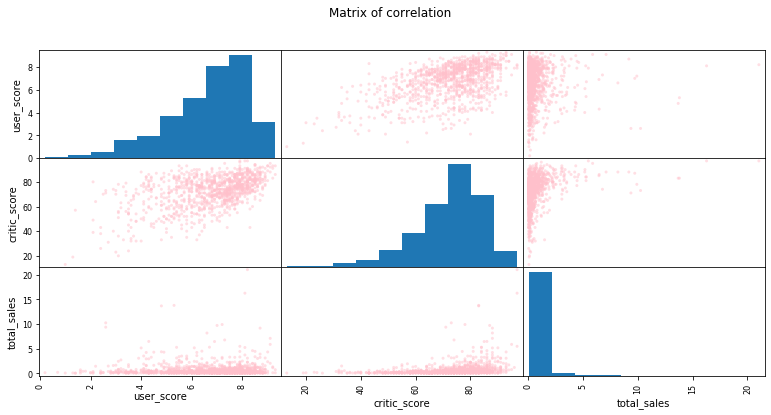

In [34]:
pd.plotting.scatter_matrix(not_ps4[['user_score', 'critic_score', 'total_sales']], figsize=(13,6), color='pink');
plt.suptitle('Matrix of correlation')
plt.show()

Точно такая же умеренная взаимосвязь между отзывами критиков и пользователей, но абсолютное отсутствие корреляции между отзывами всех с продажами.

Напоследок посмотрим на общее распределение по жанрам. Попытаемся узнать самый прибыльный жанр. 

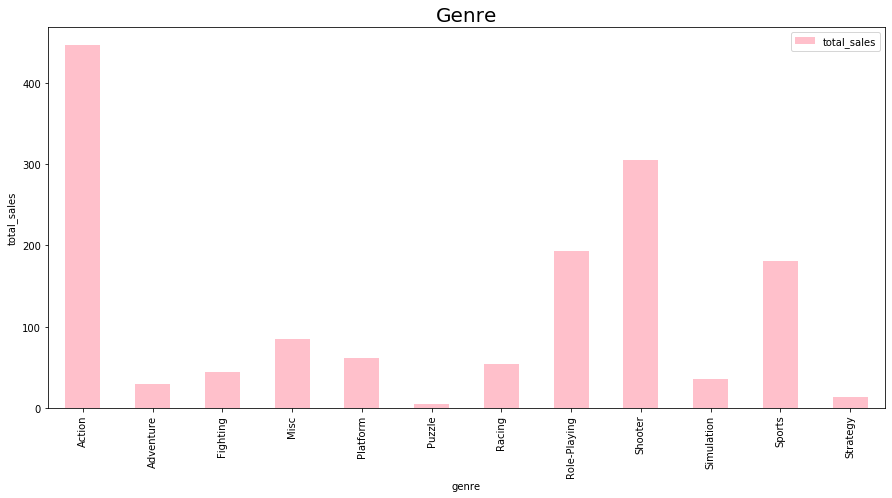

In [35]:
pivot_genre = df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
pivot_genre.plot(kind='bar', figsize=(15,7), color='pink')
plt.title('Genre', fontsize=20)
plt.xlabel('genre')
plt.ylabel('total_sales')
plt.show()

Смотря на красивейший график розового цвета можно сказать, что лидирующим жанром по продажам был жанр action и почётное второе место занимал жанр shooter. Замыкающими участниками являются стратегии и паззлы. 

### Шаг 3. Составление портрета пользователя каждого региона

Для составления портрета пользователя каждого из регионов по выбору платформы построим цикл для сбора сводной таблицы по каждому региону.

,platform,na_sales,%
0,X360,140.57,0.280210
1,PS4,108.74,0.216760
2,PS3,103.74,0.206793
3,XOne,93.12,0.185624
4,3DS,55.49,0.110613


,platform,eu_sales,%
0,PS4,141.09,0.337803
1,PS3,107.27,0.256830
2,X360,74.89,0.179304
3,XOne,51.59,0.123519
4,3DS,42.83,0.102545


,platform,jp_sales,%
0,3DS,87.79,0.507193
1,PS3,35.29,0.203882
2,PSV,21.04,0.121555
3,PS4,15.96,0.092206
4,WiiU,13.01,0.075163


,platform,other_sales,%
0,PS4,48.35,0.357037
1,PS3,43.41,0.320558
2,X360,20.49,0.151307
3,XOne,14.27,0.105376
4,3DS,8.90,0.065721


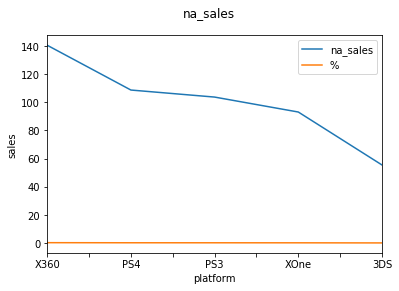

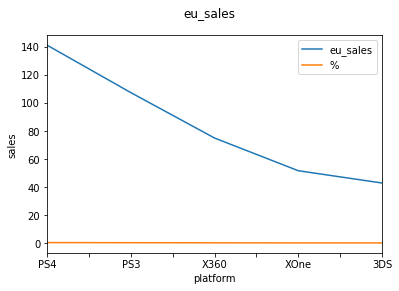

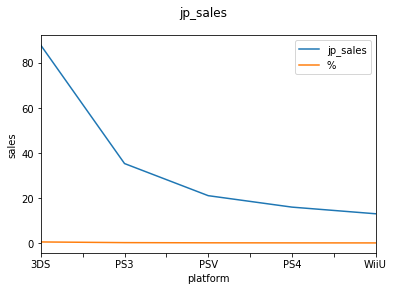

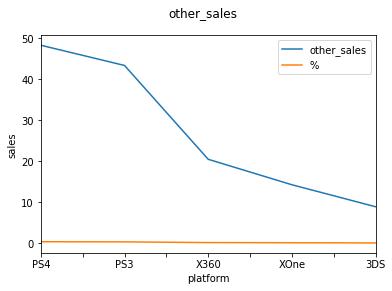

In [36]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for column in columns:
    pivot = df.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(by=column, ascending=False).reset_index().head()
    sum_sales = pivot[column].sum()
    pivot['%']= pivot[column]/sum_sales
    pivot.plot(x='platform')
    plt.suptitle(column)
    plt.ylabel('sales')
    display(pivot)

- В северной америке  распространён Xbox
- В Европе лидирует Sony Play Station
- В Японии же преобладает Nintendo DS
- На рынке всех остальных регионов лидирует компания Sony 

Далее составим цикл для определения предпочтений в жанрах в Америке, Европе и Японии.

,genre,na_sales,%
0,Action,180.15,0.354166
1,Shooter,144.79,0.284650
2,Sports,81.53,0.160284
3,Role-Playing,64.00,0.125821
4,Misc,38.19,0.075080


,genre,eu_sales,%
0,Action,161.70,0.384927
1,Shooter,113.47,0.270115
2,Sports,69.09,0.164469
3,Role-Playing,48.53,0.115526
4,Racing,27.29,0.064964


,genre,jp_sales,%
0,Role-Playing,65.44,0.432833
1,Action,52.80,0.349229
2,Misc,13.10,0.086646
3,Simulation,10.41,0.068854
4,Fighting,9.44,0.062438


,genre,other_sales,%
0,Action,51.76,0.386384
1,Shooter,37.26,0.278143
2,Sports,22.44,0.167513
3,Role-Playing,14.83,0.110705
4,Misc,7.67,0.057256


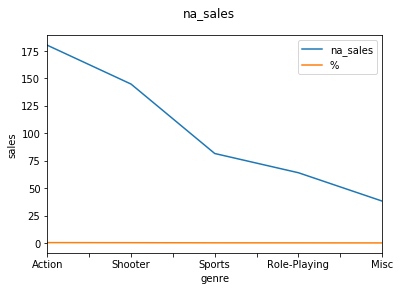

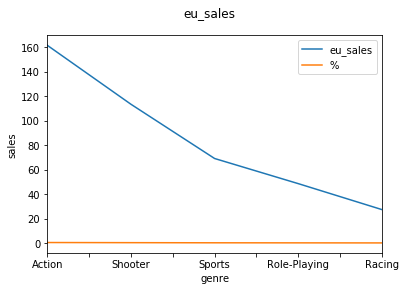

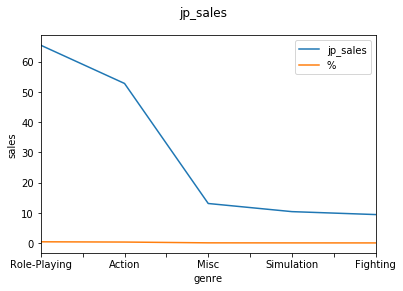

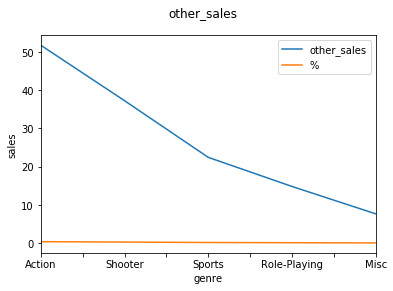

In [38]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for column in columns:
    pivot = df.pivot_table(index='genre', values=column, aggfunc='sum').sort_values(by=column, ascending=False).reset_index().head()
    sum_sales = pivot[column].sum()
    pivot['%']= pivot[column]/sum_sales
    pivot.plot(x='genre')
    plt.suptitle(column)
    plt.ylabel('sales')
    display(pivot)

* В северной Америке выбор в пользу игр в жанре action и shooter 
* В Европе мнения с северной Америкой совпали, пользователи также предпочитают action и shooter
* В Японии же предпочитают role-playing
* Во всех остальных странах пользователи повторяют опыт Северной Америки и Европы, выбирая жанры action и sports

Проверим влияние рейтинга ESRB на продажи в каждом регионе.

Существующие обозначения классификации рейтинга ESRB:

- "Е"  «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше
- "Е10+" «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови
- "Т" «Подросткам»: Игра подходит для лиц от 13 лет и старше
- "М" «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
- "АО" «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
- "К-А" 

In [47]:
# изменим пропущенные значения на no_rating, чтобы они учитывались в сводных стаблицах
df['rating'] = df['rating'].fillna('no_rating')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 12 columns):
name               2899 non-null object
platform           2899 non-null object
year_of_release    2899 non-null int64
genre              2899 non-null object
na_sales           2899 non-null float64
eu_sales           2899 non-null float64
jp_sales           2899 non-null float64
other_sales        2899 non-null float64
critic_score       1322 non-null float64
user_score         1540 non-null float64
rating             2899 non-null object
total_sales        2899 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 294.4+ KB


,rating,na_sales,%
0,M,231.67,0.390477
1,E,114.37,0.192769
2,no_rating,103.31,0.174128
3,E10+,77.93,0.131350
4,T,66.02,0.111276


,rating,eu_sales,%
0,M,194.44,0.381869
1,E,113.03,0.221984
2,no_rating,91.50,0.179701
3,E10+,57.25,0.112436
4,T,52.96,0.104010


,rating,jp_sales,%
0,no_rating,109.08,0.565709
1,E,28.33,0.146925
2,T,26.02,0.134945
3,M,21.20,0.109947
4,E10+,8.19,0.042475


,rating,other_sales,%
0,M,63.45,0.404707
1,E,31.44,0.200536
2,no_rating,27.17,0.173300
3,T,17.94,0.114428
4,E10+,16.78,0.107029


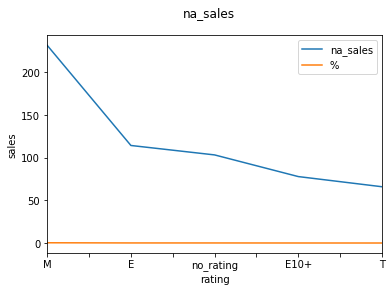

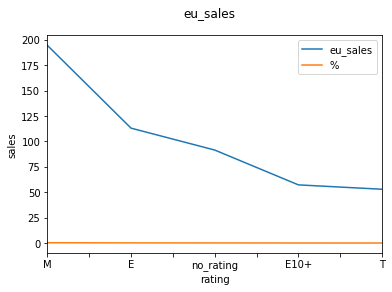

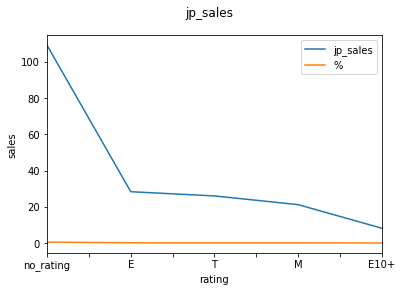

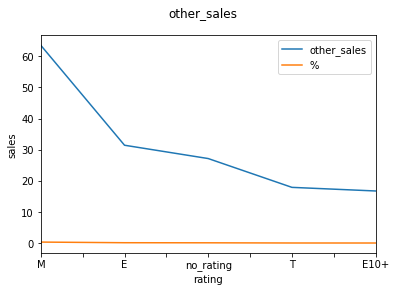

In [39]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for column in columns:
    pivot = df.pivot_table(index='rating', values=column, aggfunc='sum').sort_values(by=column, ascending=False).reset_index().head()
    sum_sales = pivot[column].sum()
    pivot['%']= pivot[column]/sum_sales
    pivot.plot(x='rating')
    plt.suptitle(column)
    plt.ylabel('sales')
    display(pivot)

* Во всех странах лидируют игры жанра "Для взрослых" 
* В Японии преобладает рынок японских платформ и японских игр, а ESRB работает на англоязычный сегмент


### Шаг 4. Проверка гипотез

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Параметр equal_var по умолчанию выбирается как True, если его не указывать, что подразумевает, что значения выборок равны. То есть, если по параметру equal_var они будут равны, то подтверждается нулевая гипотеза.

In [40]:
# импортируем библиотеку
from scipy import stats as st
import numpy as np

In [41]:
# делаем срезы датафрейма в столбце с платформами по Xbox One и PC
xbox = df.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)
pc = df.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)

In [42]:
# сравним дисперсии срезов
print(np.var(xbox))
np.var(pc)

1.8965188383045526


2.734138496439882

In [43]:
alpha = 0.05
results = st.ttest_ind(xbox, pc)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение:  0.6252774522173157
Не отвергаем нулевую гипотезу


Нулевая гипотеза подтвердилась, вывод соответствующий: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги жанров action и sports не различаются.

Параметр equal_var по умолчанию выбирается как True, если его не указывать, что подразумевает, что значения выборок равны. То есть, если по параметру equal_var они будут равны, то подтверждается нулевая гипотеза.

In [44]:
# делаем срезы датафрейма в столбце с жанрами по action и sports
action = df.query('genre == "Action"')['user_score'].dropna().reset_index(drop=True)
sports = df.query('genre == "Sports"')['user_score'].dropna().reset_index(drop=True)

In [45]:
# сравним дисперсии срезов
print(np.var(action))
np.var(sports)

1.8783732502012689


3.0073882971729127

In [46]:
alpha = 0.05
results = st.ttest_ind(action, sports)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение:  1.1405639632267916e-26
Отвергаем нулевую гипотезу


Получилось отвергнуть нулевую гипотезу, что говорит нам о том, что средние пользовательские рейтинги жанров action и sports  различаются.

### Шаг 5. Общий вывод

Описывая выводы по проекту, можно выделить следующие наблюдения для составления плана на потенциальные 3 года вперёд:
- на рынке лидирующие платформы, под которые производится и продаётся основной массив игр, это SONY Play Station и Microsoft Xbox, сюда же можно добавить платформу PC, потому что это часто предпочитаемая платформа для игр, потому что консоли создаются неразборными и без возможности вставления новых деталей, а PC можно самостоятельно начинять свежими видеокартами, памятью и т.д. 
- за проанализируемый период лидировали жанры action, shooter, sports и rpg
- статистика показала незначительное влияние отзывов на глобальные продажи, предположительно потому что люди хотят составить своё собственное мнение и впечатление об игре
- также можно выделить игры с рейтингом "Для взрослых"
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые, игры для этих платформ будут одинаково релевантны
- средние пользовательские рейтинги жанров action и sports различаются и в пользу жанра action 
- Японский сегмент предпочитает своё производство и к нему с чужим лучше не соваться

Рекомендации:
Для построения бизнес-плана на 2017 год стоит при закупках сконцентрировать внимание на:

платформах РС, PS4 и XOne 

на играх для этих платформ жанра action, shooter, rpg u sports

игр с рейтингом "Для взрослых"

Для Японии подойдут игры их производителей и для их платформ